# 1) Read-in/ Load csv dataset

In [1]:
import pandas as pd
data = pd.read_csv('heart_failure_clinical_records_dataset.csv', header=0)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.head()

Number of instances = 299
Number of attributes = 13


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
# Quick description of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
# Data definition (Meanings, measurement units, and intervals of each feature of the dataset)
definition=pd.read_excel('Data Definition.xlsx', header=0)
definition

,Feature,Explanation,Measurement,Range
0,Age,Age of the patient,Years,"[40,..., 95]"
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,"0, 1"
2,High blood pressure,If a patient has hypertension,Boolean,"0, 1"
3,Creatinine phosphokinase (CPK),Level of the CPK enzyme in the blood,mcg/L,"[23,..., 7861]"
4,Diabetes,If the patient has diabetes,Boolean,"0, 1"
5,Ejection fraction,Percentage of blood leaving,Percentage,"[14,..., 80]"
6,NaN,the heart at each contraction,NaN,NaN
7,Sex,Woman or man,Binary,"0, 1"
8,Platelets,Platelets in the blood,kiloplatelets/mL,"[25.01,..., 850.00]"
9,Serum creatinine,Level of creatinine in the blood,mg/dL,"[0.50,..., 9.40]"


## Data overview
- medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015
- 105 women (SEX=0), 194 men (SEX=1)
- age range between 40 and 95 years old
- All 299 patients had left left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure (advanced states of heart failure).
- 203 patients survived before the end of the follow-up period (DEATH_EVENT = 0)
- 96 patients died before the end of the follow-up period (DEATH_EVENT = 1) 
- Follow-up time - 4 to 285 days (mean=130 days)

## Interpretation of features
- Anaemia - haematocrit levels lower than 36%
- High blood pressure - Original dataset did not provide any definition of this
- CPK - When a muscle tissue gets damaged, CPK flows into the blood. High levels of CPK in the blood of a patient might indicate a heart failure or injured
- Ejection fraction - % of how much blood left ventricle pumps out with each contraction
- Serum creatinine - waste product generated by creatine, when a muscle breaks down. Doctors focus on serum creatinine in blood to check kidney function. High levels may indicate renal dysfunction.
- Serum sodium - Abnormally low level of sodium in blood might be caused by heart failure. Sodium is a mineral that facilitates correct functioning of muscles and nerves.
- Death Event - States if patient died or survived before the end of the follow-up period (130 days on average). Original dataset did not provide any indication whether any patient had primary kidney disease, and no additional info about what type of follow-up was carried out.

# 2) Examine and explore dataset, Exploratory Data Analysis (EDA)

In [4]:
# Examine data of numerical features
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Look at outcome classification variable (balanced/unbalanced)
print (data['DEATH_EVENT'].value_counts(normalize=True))

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64


## 2.1 Check Missing Values

In [6]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('\n')
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 299
Number of attributes = 13


Number of missing values:
	age: 0
	anaemia: 0
	creatinine_phosphokinase: 0
	diabetes: 0
	ejection_fraction: 0
	high_blood_pressure: 0
	platelets: 0
	serum_creatinine: 0
	serum_sodium: 0
	sex: 0
	smoking: 0
	time: 0
	DEATH_EVENT: 0


There are no missing values in any attributes. So no imputation was done.

There are a total of 12 features that can be used to conduct a machine learning binary classification task (i.e. DEATH_EVENT).

## 2.2 Check Duplicates

In [7]:
# check presence of duplicates
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## 2.3 Quick glance at data structure

In [8]:
# Ouick overview of each numerical attribute
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


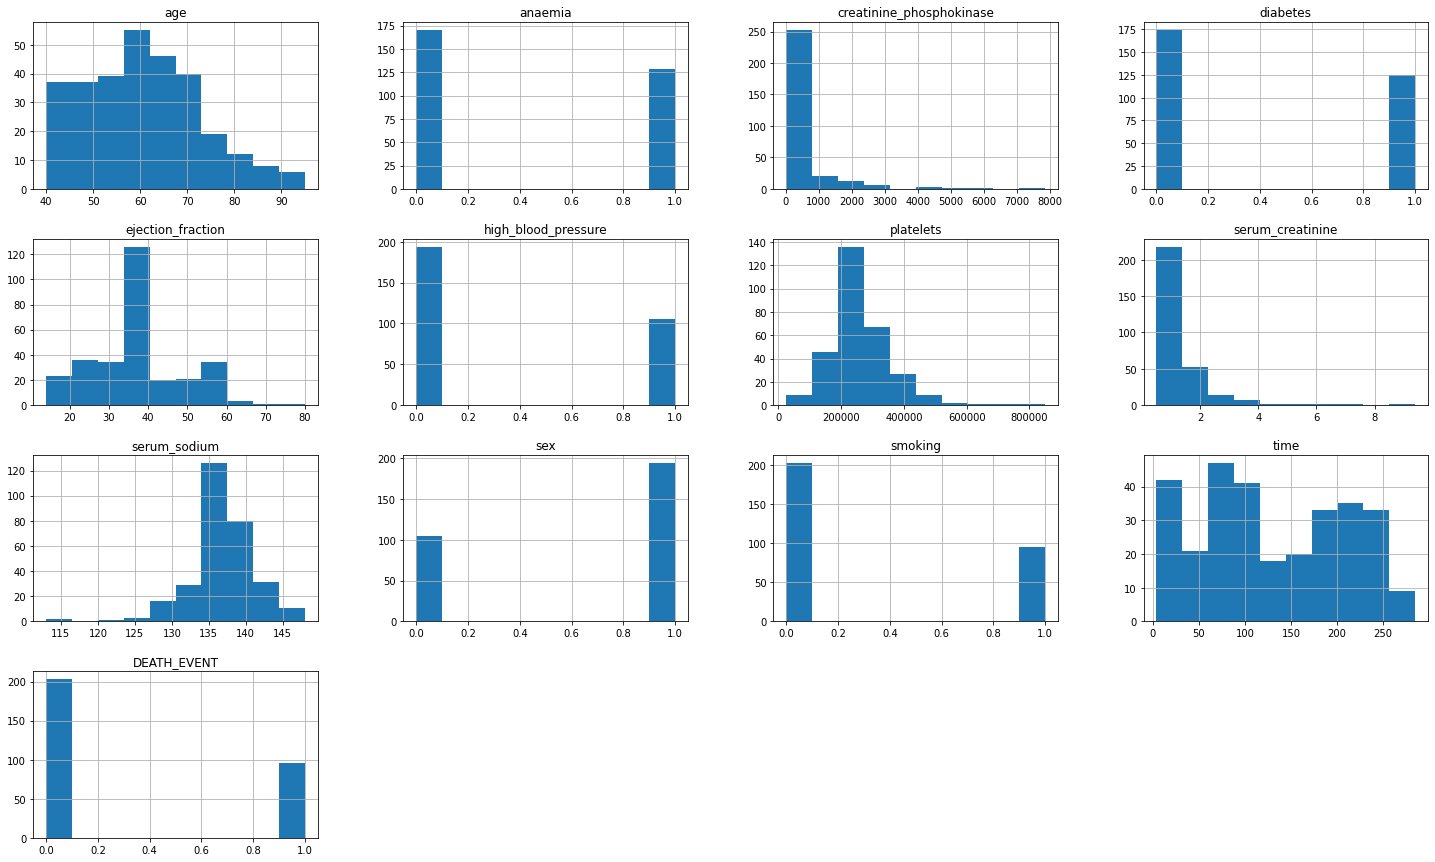

In [9]:
%matplotlib inline

# plots histogram for each numerical attribute by using hist() method
import matplotlib.pyplot as plt
data.hist(figsize=(25,15))
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   ejection_fraction         299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   serum_creatinine          299 non-null    float64
 5   serum_sodium              299 non-null    int64  
 6   time                      299 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 16.5 KB


<AxesSubplot:>

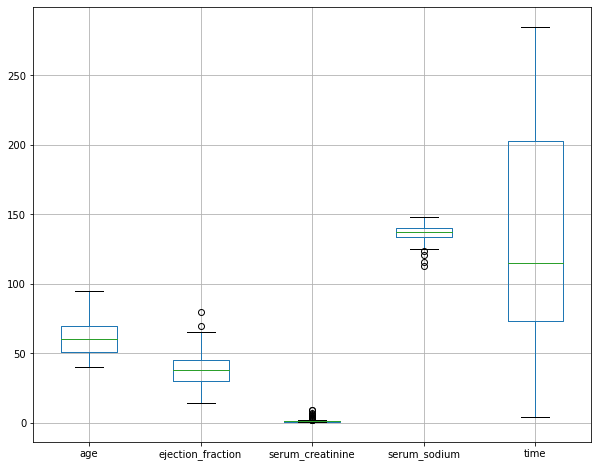

In [10]:
# using boxplot to look at distribution of non-categorical numerical data attributes as well
%matplotlib inline

# Show boxplot of feature columns in order to observe presence and extent of outliers
num_att = data[['age','creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine','serum_sodium','time']]
num_att.info()
num_att[['age','ejection_fraction','serum_creatinine','serum_sodium','time']].boxplot(figsize=(10,8))

<AxesSubplot:>

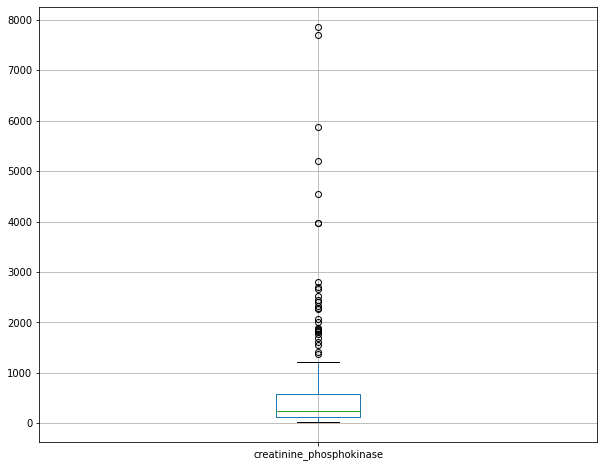

In [11]:
%matplotlib inline
# did this in another plot because of big difference in scale
crea_phos = data[['creatinine_phosphokinase']]
crea_phos.boxplot(figsize=(10,8))

<AxesSubplot:>

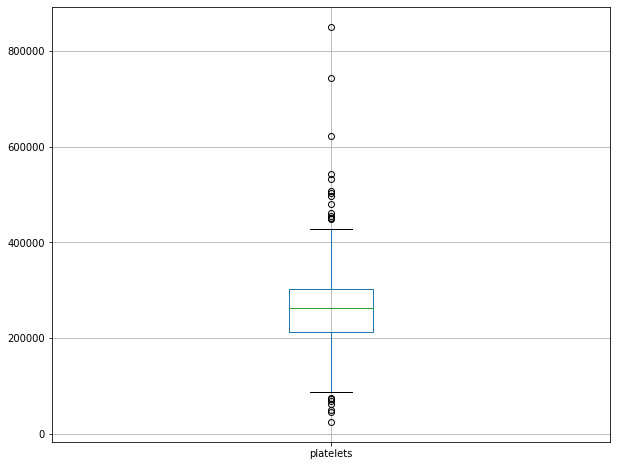

In [12]:
%matplotlib inline
# did this in another plot because of big difference in scale
platelets = data[['platelets']]
platelets.boxplot(figsize=(10,8))

Observations before doing any data processing: 
1) Numerical attributes that are non-binary (i.e. 0 or 1 such as anaemia, diabetes, high_blood_pressure, sex, smoking, death_event) have different scales. It is thus necessary to conduct feature scaling.
2) Some histogram are tail-heavy, representing skewness, which do not reflect a normal distribution (i.e. serum_creatinine, serum_sodium etc.)
3) Boxplots show quite a number of outliers especially in creatinine_phosphokinase and platelets attributes.

## 2.4) Check any correlations on original data (before scaling):

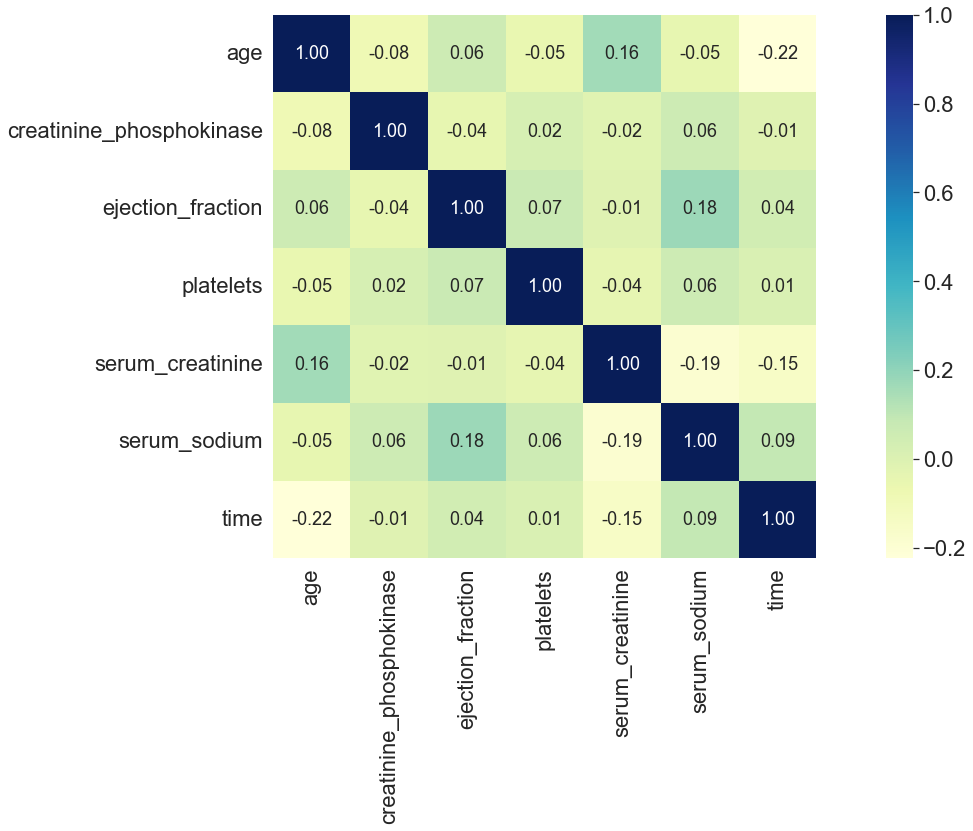

In [13]:
import seaborn as sns

# creates a function that shows correlation heatmap of numerical data
def corr_heatmap(num_data):
    corr = num_data.corr()
    plt.figure(figsize=(25,10))
    sns.set(font_scale=2)
    hm = sns.heatmap(corr, cmap='YlGnBu',fmt='.2f', square=True, annot=True, annot_kws={'size': 18})#, cbar_kws={"shrink": 0.70})
    # hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18) 
    # hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18) 
    plt.show()

# Checks correlation among numerical data (including time):
corr_heatmap(data[num_att.columns])

,feature1,feature2,correlation,abs_correlation
54,sex,smoking,0.445892,0.445892
10,anaemia,creatinine_phosphokinase,-0.190741,0.190741
49,serum_creatinine,serum_sodium,-0.189095,0.189095
37,ejection_fraction,serum_sodium,0.175902,0.175902
6,age,serum_creatinine,0.159187,0.159187
32,diabetes,sex,-0.157730,0.157730
38,ejection_fraction,sex,-0.148386,0.148386
33,diabetes,smoking,-0.147173,0.147173
47,platelets,sex,-0.125120,0.125120
18,anaemia,smoking,-0.107290,0.107290


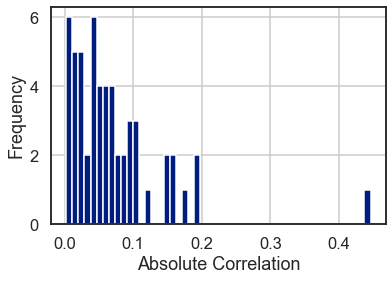

In [14]:
# Determine the correlation among features (exclude time)
import numpy as np

feature_cols = [x for x in data.columns if x not in 'DEATH_EVENT|time']
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

# Look at the top 10 highest correlated features (in terms of magnitude)
corr_values.sort_values('abs_correlation', ascending=False).query('abs_correlation>0.0').head(10)

Observation: No high correlation (i.e. > 0.5) among variables are observed. Therefore, no further data cleaning procedures are necessary.

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='age'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='age'>,
        <AxesSubplot:xlabel='platelets', ylabel='age'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='age'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='age'>,
        <AxesSubplot:xlabel='time', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='ejection_fraction', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='platelets', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='serum_creatinine', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='serum_sodium', ylabel='creatinine_phosphokinase'>,
        <AxesSubplot:xlabel='time', ylabel='creatinine_phosphokinase'>],
       [<AxesSubplot:xl

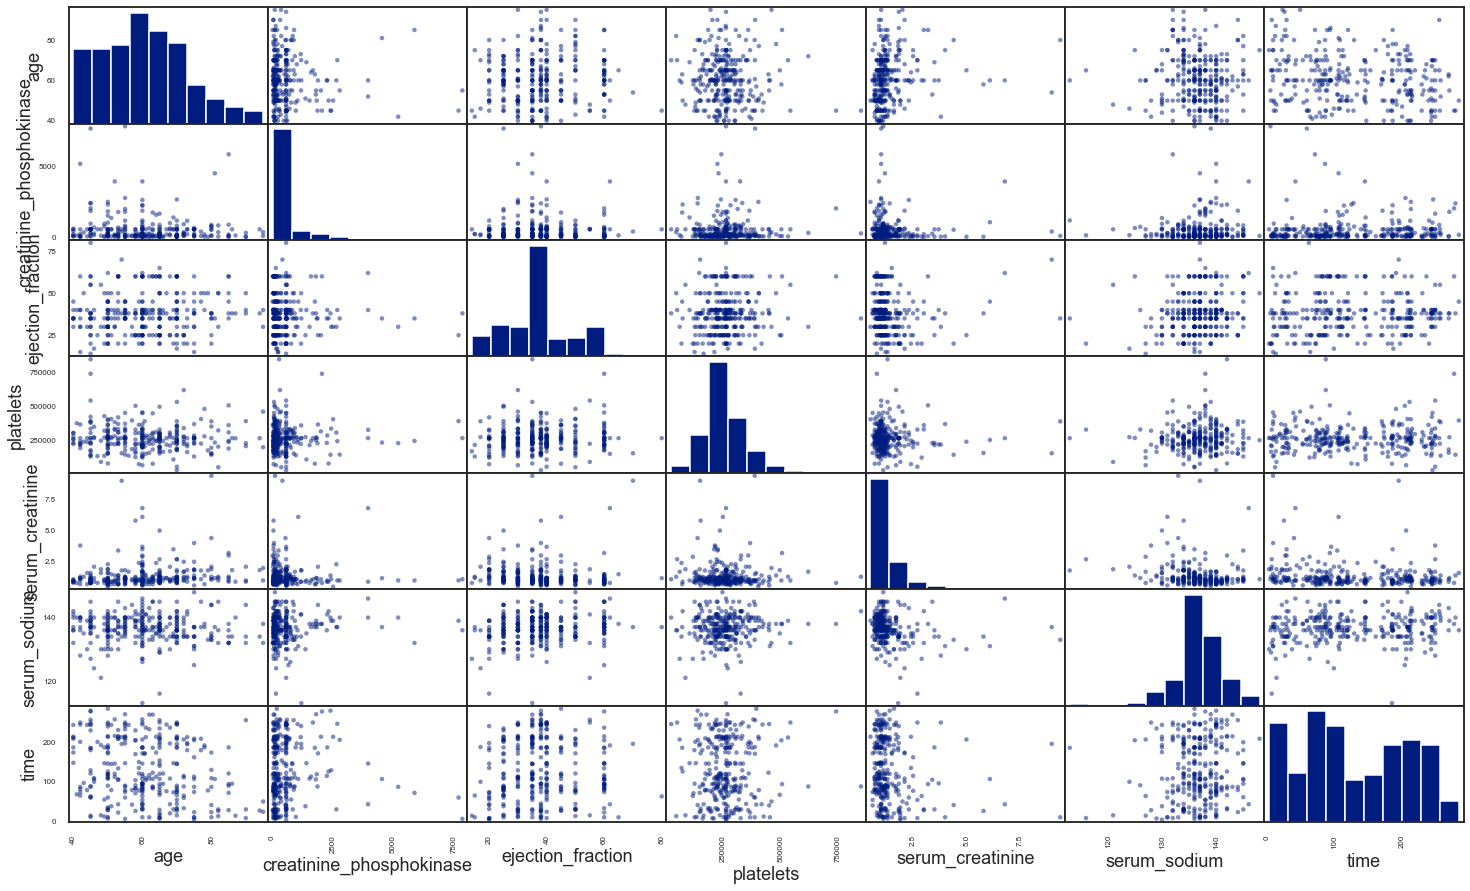

In [15]:
# plots out scatter plot diagrams of all non-categorical numerical attributes, and histogram of each non-categorical numerical attribute
from pandas.plotting import scatter_matrix

scatter_matrix(num_att, figsize=(25, 15))

# 3) Data pre-processing
## 3.1) Scale the data (feature columns)
Given that there are differences observed in the range of values across different attributes/features in this dataset (i.e. some with large range, some with low ranges), data has to be scaled so that all features are on a similar scale. This is beneficial for helping machine algorithms that use gradient descent as an optimization technique, such that the gradient descent can then be able to converge quicker towards the local/global minimum. Having features on the same scale would ensure the steps taken for gradient descent are at the same rate.

In [16]:
# Scaling
from sklearn.preprocessing import scale
import pandas as pd

# Categorical features (binary attributes) will not be scaled
cat_cols = ['anaemia','high_blood_pressure','diabetes','sex','smoking','DEATH_EVENT']
cat_data = data[cat_cols]

# Feature columns that contain real-valued numeric data will be scaled (time attribute is excluded as feature column as this study is only focused on clinical factors in the survival prediction of patients)
num_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
num_data_scaled = scale(data[num_cols])
num_data_scaled = pd.DataFrame(num_data_scaled, columns = num_cols)

display (num_data_scaled.describe().round(3))

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000,299.000,299.000,299.000,299.000,299.000
mean,0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.754,-0.577,-2.038,-2.440,-0.866,-5.363
25%,-0.828,-0.480,-0.684,-0.521,-0.478,-0.596
50%,-0.070,-0.343,-0.007,-0.014,-0.285,0.085
75%,0.772,0.000,0.585,0.411,0.006,0.766
max,2.877,7.515,3.548,6.008,7.752,2.582


<AxesSubplot:>

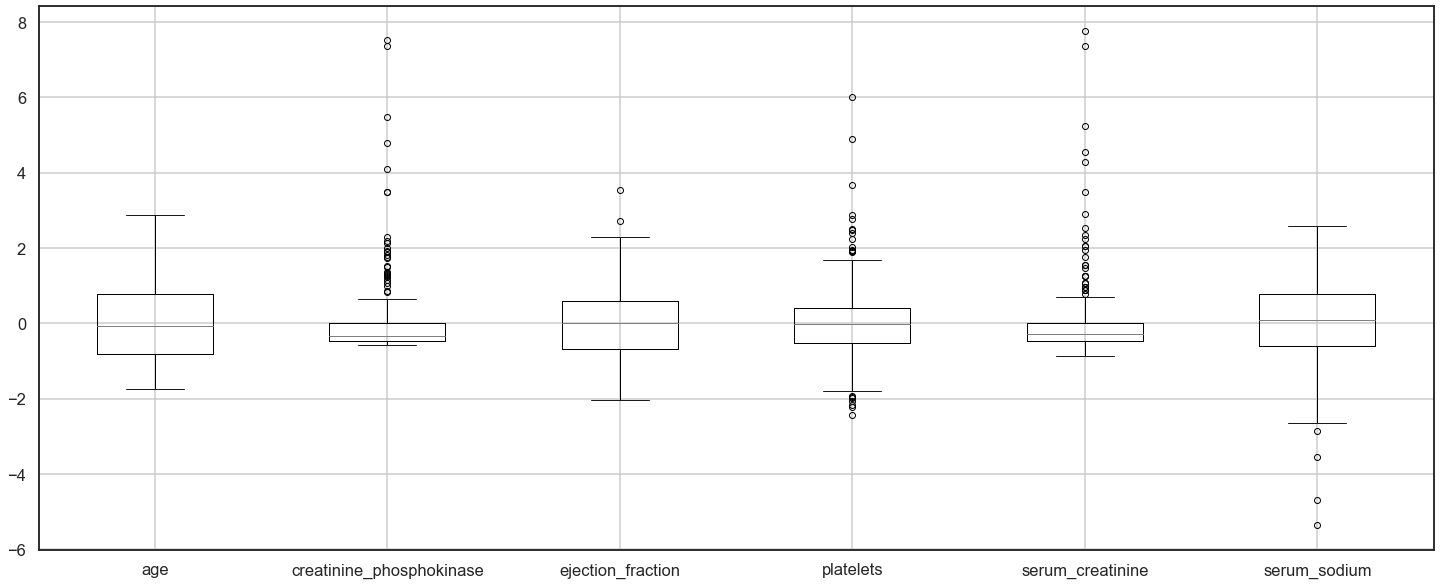

In [17]:
%matplotlib inline

# Show boxplot of scaled feature columns in order to observe presence and extent of outliers
num_data_scaled.boxplot(figsize=(25,10))

Observation from boxplot of scaled numerical feature attributes:
- Many outliers observed in attributes such as creatinine_phosphokinase, platelets, serum_creatinine, and serum_sodium.

In [18]:
# Merge num_data_scaled dataframe and categorical dataframe (excluded time attribute)
data2 = pd.concat([num_data_scaled, data[['time']], cat_data], axis=1)

display (data2.describe().round(3))

# remove outliers that are more than 3 standard deviations 
print('Number of rows before discarding outliers = %d' % (data2.shape[0]))

# keep only those numerical column scaled data within -3 < Z < 3
data3 = data2.loc[((data2[num_cols] > -3).sum(axis=1)==len(data2[num_cols].columns)) & ((data2[num_cols] <= 3).sum(axis=1)==len(data2[num_cols].columns)),:].reset_index()
data3.drop(columns=['index'],axis=1, inplace=True)
print('Number of rows after discarding outliers = %d' % (data3.shape[0]))

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,high_blood_pressure,diabetes,sex,smoking,DEATH_EVENT
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,0.000,0.000,0.000,0.000,-0.000,-0.000,130.261,0.431,0.351,0.418,0.649,0.321,0.321
std,1.002,1.002,1.002,1.002,1.002,1.002,77.614,0.496,0.478,0.494,0.478,0.468,0.468
min,-1.754,-0.577,-2.038,-2.440,-0.866,-5.363,4.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.828,-0.480,-0.684,-0.521,-0.478,-0.596,73.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,-0.070,-0.343,-0.007,-0.014,-0.285,0.085,115.000,0.000,0.000,0.000,1.000,0.000,0.000
75%,0.772,0.000,0.585,0.411,0.006,0.766,203.000,1.000,1.000,1.000,1.000,1.000,1.000
max,2.877,7.515,3.548,6.008,7.752,2.582,285.000,1.000,1.000,1.000,1.000,1.000,1.000


Number of rows before discarding outliers = 299
Number of rows after discarding outliers = 280


<AxesSubplot:>

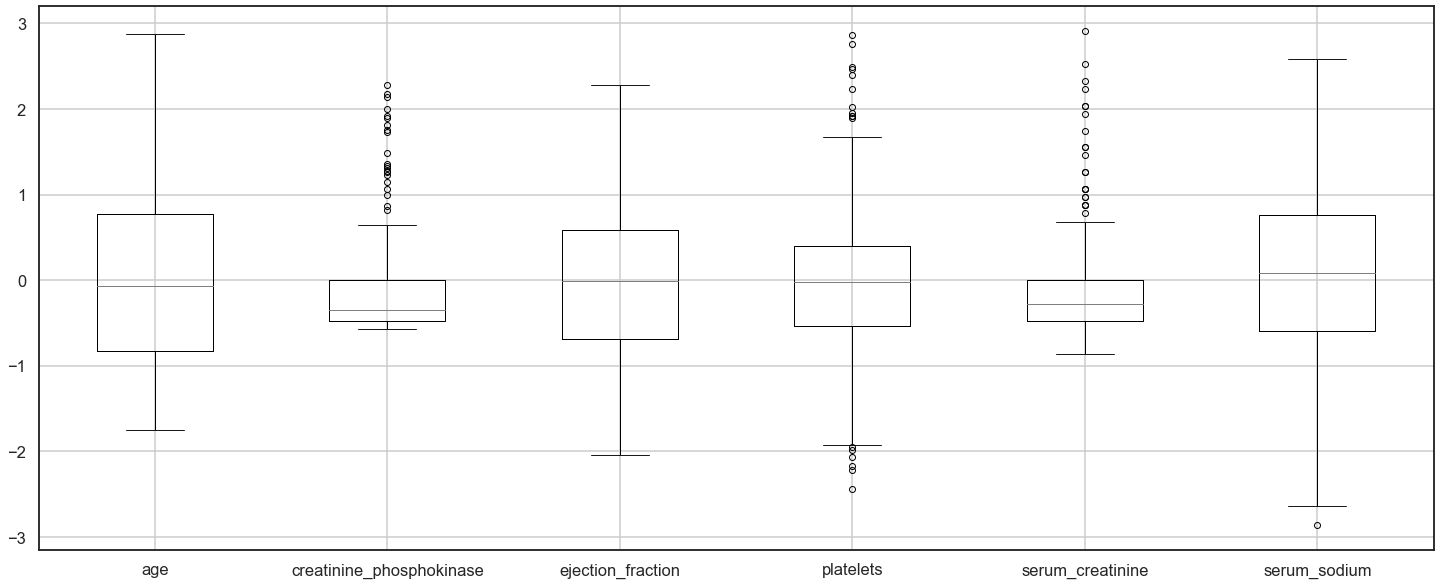

In [19]:
# Show boxplot after dropping outliers
%matplotlib inline

# Show boxplot of scaled feature columns after dropping outliers >3 std dev
data3[num_cols].boxplot(figsize=(25,10))

## 3.2) Prepare dataset for train, test split before fitting to model for training
- Drop 'time' attribute because only interested in clinical and demographic features in binary classification

In [20]:
# drop 'time' attribute since only interested in clinical features/attributes
df = data3.drop(['time'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       280 non-null    float64
 1   creatinine_phosphokinase  280 non-null    float64
 2   ejection_fraction         280 non-null    float64
 3   platelets                 280 non-null    float64
 4   serum_creatinine          280 non-null    float64
 5   serum_sodium              280 non-null    float64
 6   anaemia                   280 non-null    int64  
 7   high_blood_pressure       280 non-null    int64  
 8   diabetes                  280 non-null    int64  
 9   sex                       280 non-null    int64  
 10  smoking                   280 non-null    int64  
 11  DEATH_EVENT               280 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 26.4 KB


## 3.3) Split dataset into train and test sets
- Used `StratifiedShuffleSplit` to maintain the same ratio of predictor classes
- Observe the ratio of DEATH_EVENT in both the train and test splits

In [21]:
# np.random.seed(42)

# done on df
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

for train_index,test_index in strat_shuf_split.split(df,df['DEATH_EVENT']):
    split_train = df.loc[train_index]
    split_test = df.loc[test_index]
    print("\n TRAIN:")
    # display(split_train)
    print(split_train['DEATH_EVENT'].value_counts(normalize=True))
    print ("~"*25)
    print("\n TEST:")
    # display(split_test)
    print(split_test['DEATH_EVENT'].value_counts(normalize=True))
print ('~'*50)

# train_index, test_index = next(strat_shuf_split.split(df[feature_cols], df['DEATH_EVENT']))

# Create the dataframes
X_train = df.loc[train_index, feature_cols]
y_train = df.loc[train_index, 'DEATH_EVENT']

X_test  = df.loc[test_index, feature_cols]
y_test  = df.loc[test_index, 'DEATH_EVENT']


 TRAIN:
0    0.693878
1    0.306122
Name: DEATH_EVENT, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~

 TEST:
0    0.690476
1    0.309524
Name: DEATH_EVENT, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# 4) Build and Train model using Logistic Regression first and analyze the metrics

In [22]:
# Given dataset is imbalanced, define class weights before building and training model
print (df.shape)
print (df['DEATH_EVENT'].value_counts(normalize=True))

(280, 12)
0    0.692857
1    0.307143
Name: DEATH_EVENT, dtype: float64


## 4.1) Build and Train model

In [23]:
from sklearn.linear_model import LogisticRegression

# Base model, liblinear solver is chosen because the dataset is small
# Class weights are defined by taking the inverse of label distribution (i.e. class 0 will be assigned weight of 31%, class 1 will be assigned weight of 69%)
lr = LogisticRegression(solver='liblinear', class_weight={0:df['DEATH_EVENT'].value_counts(normalize=True)[1], 1:df['DEATH_EVENT'].value_counts(normalize=True)[0]}).fit(X_train, y_train)

# Prediction
lr_y_pred = lr.predict(X_test)
lr_y_prob = lr.predict_proba(X_test)

## 4.2) Show accuracy, percision, recall, f1-score

In [24]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

cr_lr = classification_report(y_test, lr_y_pred)
print ("Classification_report:")
print(cr_lr)

# Precision, recall, f-score from binary class
precision, recall, fscore, _ = score(y_test, lr_y_pred, average='binary')

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_y_pred)

# ROC-AUC scores
auc = roc_auc_score(y_test, lr_y_pred)

results_lr= list()
results_lr.append(pd.Series({'accuracy':accuracy,
                            'precision':precision, 
                            'recall':recall, 
                            'f1':fscore, 
                            'auc':auc}, name='Logistic Regression'))
results_lr = pd.concat(results_lr, axis=1, )
print ("Results of Logistic Regression Model:")
display (results_lr)

Classification_report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        58
           1       0.59      0.77      0.67        26

    accuracy                           0.76        84
   macro avg       0.73      0.76      0.74        84
weighted avg       0.79      0.76      0.77        84

Results of Logistic Regression Model:


,Logistic Regression
accuracy,0.761905
precision,0.588235
recall,0.769231
f1,0.666667
auc,0.763926


For diagnosis of heart failure, it's important to have high recall since having more false positives is better because we cannot afford to have any false negatives (cannot afford to miss any detection).

## 4.3) Show Confusion Matrix, ROC-AUC and precision-recall curves, Features Importance chart

### 4.3.1) Confusion Matrix

Results of Model: Confusion Matrix


array([[44, 14],
       [ 6, 20]], dtype=int64)

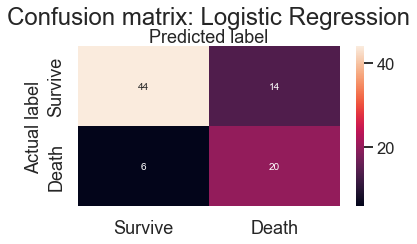

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
print ("Results of Model: Confusion Matrix")
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(y_test, lr_y_pred)
display (confusionmatrix)

# Plot confusion matrix
fig, ax = plt.subplots()
# create heatmap
labels=['Survive', 'Death']
cm_heatmap = sns.heatmap(confusionmatrix, annot=True, fmt='d')
sns.set(font_scale=2)
cm_heatmap.set_xticklabels(cm_heatmap.get_xmajorticklabels(), fontsize = 18) 
cm_heatmap.set_yticklabels(cm_heatmap.get_ymajorticklabels(), fontsize = 18) 
cm_heatmap.set_xticklabels(labels)
cm_heatmap.set_yticklabels(labels)
cm_heatmap.xaxis.set_label_position("top")
cm_heatmap.set_title('Confusion matrix: Logistic Regression', y=1.1)
cm_heatmap.set_ylabel('Actual label', fontsize=18)
cm_heatmap.set_xlabel('Predicted label', fontsize=18)
plt.tight_layout()

### Observations on Confusion Matrix of Logistic Regression model:
- First row shows the negative class (survived)
    - 44 cases are correctly classified as survived (True Negative)
    - 14 cases are incorrectly classified as survived (False Positive)
- Second row shows the positive class (death)
    - 6 cases are incorrectly classified as dead (False Negative)
    - 20 cases are correctly classified as dead (True Positive)

### 4.3.2) Visualise ROC-AUC, Precision-Recall Curves

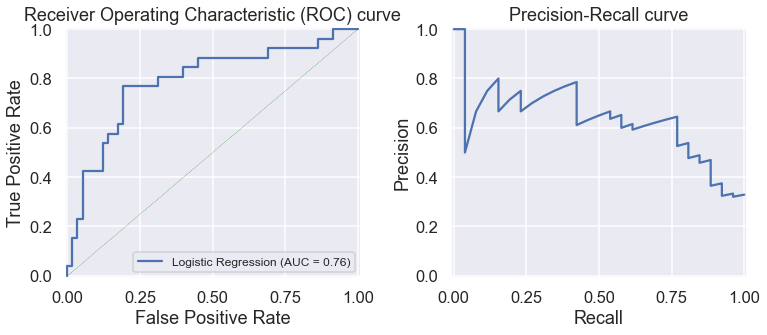

In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(11, 5)

# Plot the ROC-AUC curve
ax = axList[0]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_y_prob[:,1])
ax.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, lr_y_pred))
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='green', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Receiver Operating Characteristic (ROC) curve',
       )
ax.legend(loc='lower right', fontsize=12)
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_y_prob[:,1])
ax.plot(recall_lr, precision_lr)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### 4.3.3) Features Importance Chart (Logistic Regression Coefficient)

Feature 0, Score: 0.47830 	 age
Feature 1, Score: 0.14209 	 anaemia
Feature 2, Score: -0.14804 	 creatinine_phosphokinase
Feature 3, Score: 0.03670 	 diabetes
Feature 4, Score: -0.74968 	 ejection_fraction
Feature 5, Score: 0.56554 	 high_blood_pressure
Feature 6, Score: -0.01757 	 platelets
Feature 7, Score: 0.88745 	 serum_creatinine
Feature 8, Score: -0.22585 	 serum_sodium
Feature 9, Score: -0.16910 	 sex
Feature 10, Score: -0.08126 	 smoking


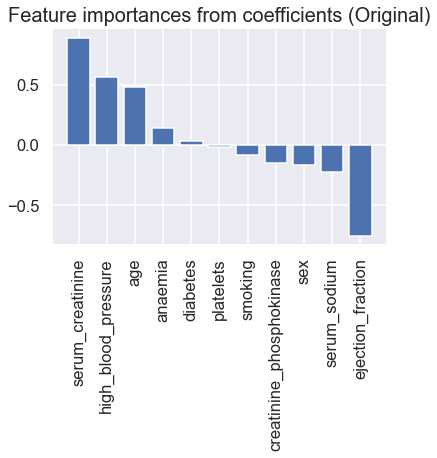

In [27]:
# Get importance of features by using the coefficients of the logistic regression model
lr_importance_coef = lr.coef_[0]

# Summarize feature importance
for i,j in enumerate(lr_importance_coef):
	print('Feature %0d, Score: %.5f \t %s' % (i, j, X_train.columns[i]))

# Creates dataframe in order for easier sorting of both index and text string
lr_importance = pd.DataFrame(data={
							'Features' : X_train.columns,
							'Importance' : lr.coef_[0]
})
# Sorts dataframe in descending order
lr_importance = lr_importance.sort_values(by="Importance", ascending=False)


# Plot feature importance 
import matplotlib.pyplot as plt

# Plot one with original positive and negative coefficients first
plt.bar(x=lr_importance['Features'], height=lr_importance['Importance'])
plt.xticks(rotation='vertical')
plt.title('Feature importances from coefficients (Original)', fontsize=20)
plt.show()


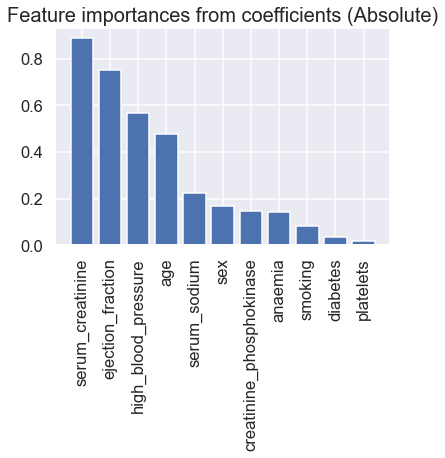

In [28]:
# Duplicates dataframe for converting coefficients to absolute value in order to show features with top few coefficients
lr_importance_abs = lr_importance.copy()
lr_importance_abs['Importance'] = abs(lr_importance_abs['Importance'])
lr_importance_abs = lr_importance_abs.sort_values(by='Importance', ascending=False)

# Plot second one with absolute value of coefficients)
plt.bar(x=lr_importance_abs['Features'], height=lr_importance_abs['Importance'])
plt.xticks(rotation='vertical')
plt.title('Feature importances from coefficients (Absolute)', fontsize=20)
plt.show()

Observations on Features Importance of Binary Logistic Regression Classifier model:
- Serum_creatinine and ejection_fraction are the top 2 features in predicting whether a patient survives/die 

## 4.4) Prepare dataframe containing data of test dataset (features, Death_Event labels (Y_test), and the logistic regression's predicted labels (Y_pred))

In [29]:
# Creates dataframe to store X_test features, Y_test labels (DEATH_EVENT), and Y_pred (the model's predicted labels)
# Converts y_test from series to dataframe, index number follows original
act = y_test.to_frame()

# Converts lr_y_pred from numpy array to series, using index number of y_test (original)
pred = pd.Series(lr_y_pred, index=y_test.index).to_frame(name='Y_predict')

# Concatenate all dataframes
act_pred = pd.concat([X_test, act, pred], axis=1)
act_pred

# exports to csv if necessary
# act_pred.to_csv("logistic_regression_data.csv")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,Y_predict
256,-0.070223,1,-0.335348,1,-0.684180,0,-1.160973e+00,-0.381379,0.085034,1,1,0,0
269,-1.333392,0,0.000166,1,1.431768,0,2.863994e+00,-0.381379,-1.050016,0,0,0,0
158,-0.912335,1,-0.481942,0,-1.530560,0,-7.615487e-01,-0.575031,0.539054,1,0,0,0
73,-0.070223,1,-0.522203,1,-1.107370,0,-6.898571e-01,1.071014,-1.050016,0,0,1,1
51,-0.070223,1,0.025974,0,0.162199,0,-4.850242e-01,-0.768683,0.312044,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,-0.912335,0,1.305056,1,-0.260991,0,7.535660e-09,-0.207091,0.085034,1,1,0,0
257,-1.333392,0,0.000166,0,-0.007077,1,1.624755e+00,-0.575031,0.085034,0,0,0,0
77,-0.491279,0,-0.552141,0,-0.260991,1,-9.254150e-01,-0.284552,0.085034,1,0,0,0
245,0.603467,1,-0.438583,1,1.854958,0,-5.669574e-01,-0.381379,0.766064,0,0,0,0


# 5) Build and Train model using Random Forest and Extra Tree next and compare
- Random Forest has been touted by a paper published in 2020 to be their top performing classifier
- Having learnt that there is Extra Trees classifier on top of Random Forest classifier, which incorporates additional randomness, i plan to run both in order to determine the best model for my objective

In [30]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## 5.1) Random Forest classifier
- Ensemble of decision trees
- Introduce extra randomness when growing trees instead of searching for the best feature when splitting a node
- Hence, it searches for the best feature among a random subset of features
- Errors are further reduced for Random Forest relative to Bagging
- Goal is to grow enough trees until error settles down because additional trees won't improve results
- This greater tree diversity trades a high bias for lower variance

In [31]:
# Creates a list of possible number of trees to test later
number_of_trees = [10, 20, 30, 40, 50, 75, 100, 150, 200, 300, 400, 500, 600]

In [32]:
# Start with Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# n_estimators is not defined, default is 100 trees
# Class weight is specified as the dataset is imbalanced
RF = RandomForestClassifier(class_weight={0:df['DEATH_EVENT'].value_counts(normalize=True)[1], 1:df['DEATH_EVENT'].value_counts(normalize=True)[0]},
                            criterion='gini',
                            oob_score=True,     # estimate the generalization score
                            random_state=42,    
                            warm_start=True,    # reuse the solution of the previous call to fit and add more estimators to the ensemble
                            n_jobs=-1)          # use all processors

oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in number_of_trees:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

display (rf_oob_df)
print ("~"*50)

# Returns the first 2 rows with the smallest OOB error value
print ('OOB Error stabilisation range:')
rf_oob_df['oob'].nsmallest(2)

,oob
n_trees,
10.0,0.290816
20.0,0.306122
30.0,0.265306
40.0,0.260204
50.0,0.265306
75.0,0.275510
100.0,0.260204
150.0,0.265306
200.0,0.270408


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
OOB Error stabilisation range:


n_trees
40.0     0.260204
100.0    0.260204
Name: oob, dtype: float64

Observation from Random Forest model:
- From the above, the out-of-bag (OOB) error is lowest at 40 and 100 trees.

## 5.2) Extra Trees Classifier
- select features randomly and create splits randomly, don't choose greedily
- Make trees even more random by using random thresholds for each feature instead of searching for best possible thresholds
- Trades more bias for lower variance
- Much faster to train than regular Random Forest

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the extra tree classifier
ET = ExtraTreesClassifier(class_weight={0:df['DEATH_EVENT'].value_counts(normalize=True)[1], 1:df['DEATH_EVENT'].value_counts(normalize=True)[0]},
                          oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,   # bootstrap samples are used when building trees
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for number of trees
for n_trees in number_of_trees:
    
    # Use this to set the number of trees
    ET.set_params(n_estimators=n_trees)
    ET.fit(X_train, y_train)

    # oob error
    oob_error = 1 - ET.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

display (et_oob_df)
print ("~"*50)

# Returns the minimum OOB error value
print ('OOB Error: Minimum')
et_oob_df['oob'].nsmallest(1)

,oob
n_trees,
10.0,0.341837
20.0,0.357143
30.0,0.331633
40.0,0.346939
50.0,0.336735
75.0,0.311224
100.0,0.331633
150.0,0.326531
200.0,0.311224


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
OOB Error: Minimum


n_trees
75.0    0.311224
Name: oob, dtype: float64

## 5.3) Compare Out-of-Bag (OOB) errorsfor both Random Forest Classifier and Extra Trees Classifiery

,Random Forest,Extra Trees,Lowest OOB error
n_trees,,,
10.0,0.290816,0.341837,Random Forest
20.0,0.306122,0.357143,Random Forest
30.0,0.265306,0.331633,Random Forest
40.0,0.260204,0.346939,Random Forest
50.0,0.265306,0.336735,Random Forest
75.0,0.275510,0.311224,Random Forest
100.0,0.260204,0.331633,Random Forest
150.0,0.265306,0.326531,Random Forest
200.0,0.270408,0.311224,Random Forest


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Random Forest    1.0
Name: Lowest OOB error, dtype: float64
The better classifier model is Random Forest.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


[Text(0, 0.5, 'out-of-bag error')]

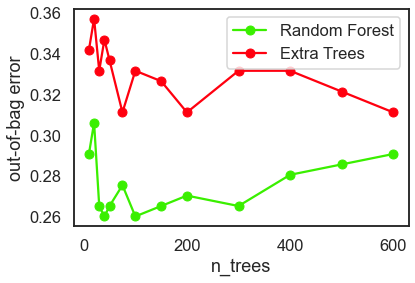

<Figure size 1080x576 with 0 Axes>

In [34]:
# Combine 2 dataframes from RB and EF
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'Random Forest'}),
                    et_oob_df.rename(columns={'oob':'Extra Trees'})], axis=1)

# Creates additional column to distinguish which method has lowest OOB error
oob_df['Lowest OOB error'] = np.where(oob_df['Random Forest'] < oob_df['Extra Trees'],"Random Forest","Extra Trees")
display (oob_df)
print ("~"*50)

# Determine which model is better
# 1) Observe which classifier has higher proportion of having the lowest OOB error for the same number of trees parsed in
print (oob_df['Lowest OOB error'].value_counts(normalize=True))
print ('The better classifier model is ' +  oob_df['Lowest OOB error'].max() + '.')
print ("~"*50)

# 2) Plot out graph to visualize
sns.set_context('talk')
sns.set_palette('prism')    # 'seaborn color palette' for suggestions
sns.set_style('white')

ax = oob_df.plot(marker='o')
plt.figure(figsize=(15,8))
ax.set(ylabel='out-of-bag error')


# 6) Build and train Random Forest Classifier model with 40 trees since it gives lowest OOB error
## 6.1) Build and Train model

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# n_estimators is now set at 40
RF40 = RandomForestClassifier(class_weight={0:df['DEATH_EVENT'].value_counts(normalize=True)[1], 1:df['DEATH_EVENT'].value_counts(normalize=True)[0]},
                            n_estimators=40,   # 40 is based on previous run (Section 5)
                            criterion='gini',
                            oob_score=True,     # estimate the generalization score
                            random_state=42,    
                            warm_start=True,    # reuse the solution of the previous call to fit and add more estimators to the ensemble
                            n_jobs=-1)          # use all processors

# Fit the model
RF40.fit(X_train, y_train)

# Get the oob error
RF40_oob_error = 1 - RF40.oob_score_
print ("Out-of-Bag error = " + str(RF40_oob_error))
print ("~"*50)

# Prediction
RF40_y_pred = RF40.predict(X_test)

# Get the probabilities for each of the two categories. 
# predict_proba() returns the number of votes for each class and then divided by the number of trees in the forest.
RF40_y_prob = RF40.predict_proba(X_test)

Out-of-Bag error = 0.2602040816326531
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## 6.2) Show accuracy, percision, recall, f1-score

In [36]:
# Show accuracy, percision, recall, f1-score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, RF40_y_pred)
print(cr)

# Creates the dataframe to store metrics of Random Forest Classifier model
results_RF40 = pd.DataFrame({'accuracy': accuracy_score(y_test, RF40_y_pred),
                         'precision': precision_score(y_test, RF40_y_pred),
                         'recall': recall_score(y_test, RF40_y_pred),
                         'f1': f1_score(y_test, RF40_y_pred),
                         'auc': roc_auc_score(y_test, RF40_y_pred)},
                         index=pd.Index(['Random Forest']))

# Compare metrics of Random Forest Classifier with Logistic Regression Classifier
result_compare = pd.concat([results_lr, results_RF40.T], axis=1)
display (result_compare)


              precision    recall  f1-score   support

           0       0.78      0.97      0.86        58
           1       0.83      0.38      0.53        26

    accuracy                           0.79        84
   macro avg       0.81      0.68      0.69        84
weighted avg       0.79      0.79      0.76        84



,Logistic Regression,Random Forest
accuracy,0.761905,0.785714
precision,0.588235,0.833333
recall,0.769231,0.384615
f1,0.666667,0.526316
auc,0.763926,0.675066


Observations of model comparison:
- For diagnosis of heart failure, it's important to have high recall since having more false positives is better because we cannot afford to have any false negatives (cannot afford to miss any detection).
- Logistic Regression (LR) model has marginally lower accuracy at 76% than Random Forest Classifier's (RFC) model accuracy of 79%.
- Precision scores, a ratio between true positive and all positive, for both models are 59% and 83% respectively. Although RFC has higher predictive capability in correctly identifying patients’ death out of all deaths, the recall score is significantly weaker at just 38%. On the contrary, LR has recall score of 77%, which suggest that it is able to accurately predict correct death events of patients. In the context of this project’s objective, LR model is preferred to RFC model.
- F1 score is higher in Logistic Regression model than Random Forest Classifier (0.67 vs 0.53).
- ROC-AUC for Logistic Regression model is relatively higher than Random Forest Classifier's one (0.76 vs 0.68).

Based on the above metrics, Logistic Regression Model is considered to be better than Random Forest Classifier in attaining our objective of classifying patients survival outcome based on clinical and demographic features. 

## 6.3) Show Confusion Matrix, ROC-AUC and precision-recall curves, Features Importance chart

### 6.3.1) Confusion Matrix

[[56  2]
 [16 10]]


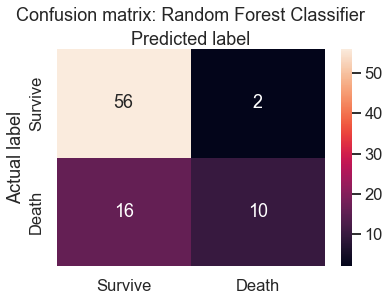

In [37]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

# Create heatmap of confusion matrix
# sns.set_context('talk')
RF40_cm = confusion_matrix(y_test, RF40_y_pred)
print(RF40_cm)
# sns.set(font_scale=2)
RF40_cm_heatmap = sns.heatmap(RF40_cm, annot=True, fmt='d')

labels = ['Survive', 'Death']
RF40_cm_heatmap.set_xticklabels(labels)
RF40_cm_heatmap.set_yticklabels(labels)
RF40_cm_heatmap.set_title('Confusion matrix: Random Forest Classifier', y=1.1)
RF40_cm_heatmap.set_ylabel('Actual label')
RF40_cm_heatmap.set_xlabel('Predicted label')
RF40_cm_heatmap.xaxis.set_label_position("top")
# RF40_cm_heatmap.set_xticklabels(RF40_cm_heatmap.get_xmajorticklabels(), fontsize = 18) 
# RF40_cm_heatmap.set_yticklabels(RF40_cm_heatmap.get_ymajorticklabels(), fontsize = 18) 


### Observations on Confusion Matrix of Random Forest Classifier model:
- First row shows the negative class (survived)
    - 56 cases are correctly classified as survived (True Negative)
    - 2 cases are incorrectly classified as survived (False Positive)
- Second row shows the positive class (death)
    - 16 cases are incorrectly classified as dead (False Negative)
    - 10 cases are correctly classified as dead (True Positive)

### 6.3.2) ROC-AUC curve and Precision-Recall curves 
- includes chart from logistic regression model ran initially

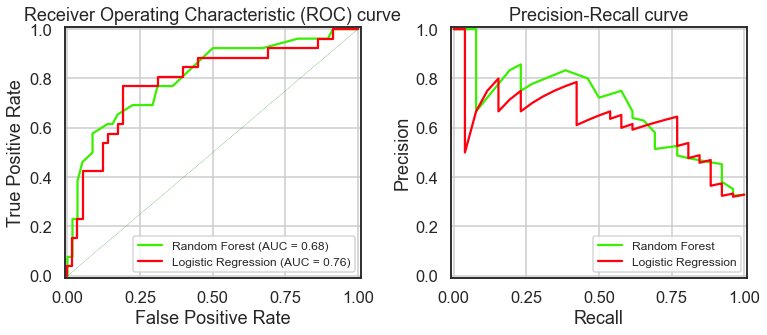

In [38]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(11, 5)

# Plot the ROC-AUC curve
ax = axList[0]

fpr_RF40, tpr_RF40, thresholds_RF40 = roc_curve(y_test, RF40_y_prob[:,1])
ax.plot(fpr_RF40, tpr_RF40, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, RF40_y_pred))
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='green', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Receiver Operating Characteristic (ROC) curve',
       )
# include roc-auc curve from logistic regression model ran previously
ax.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, lr_y_pred))
ax.legend(loc='lower right', fontsize=12)
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision_RF40, recall_RF40, _ = precision_recall_curve(y_test, RF40_y_prob[:,1])
ax.plot(recall_RF40, precision_RF40, label='Random Forest')
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
# include precision-recall curve from logistic regression model ran previously
ax.plot(recall_lr, precision_lr, label='Logistic Regression')
ax.legend(loc='lower right', fontsize=12)
ax.grid(True)

plt.tight_layout()

### 6.3.3) Features importance chart

[Text(0.5, 0, 'Features')]

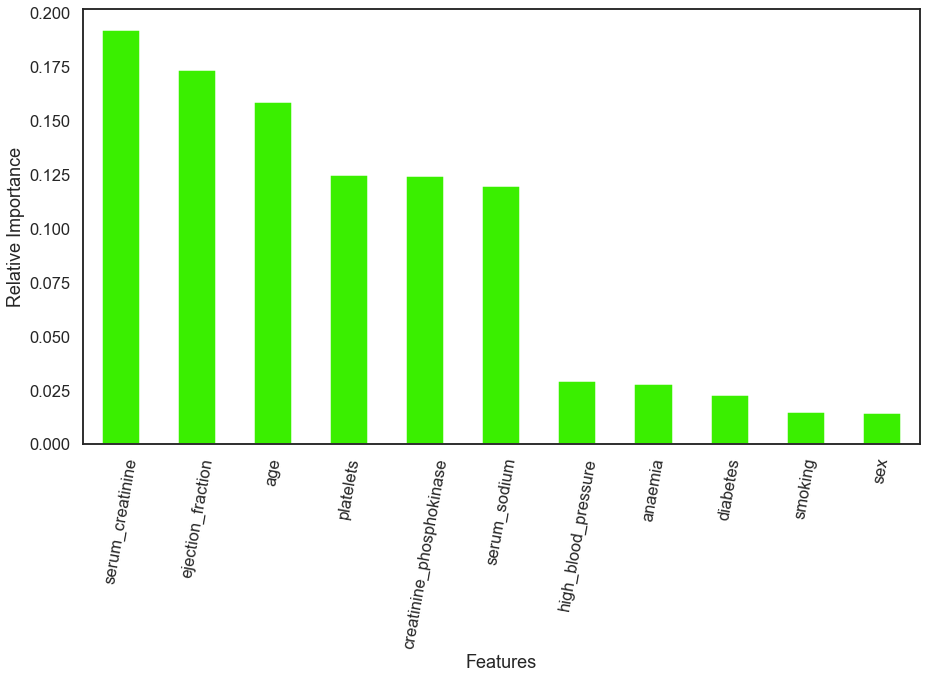

In [39]:
# Create a series of sorted values of RF40 model's features' relative importance values in descending order
feature_imp = pd.Series(RF40.feature_importances_, index=feature_cols).sort_values(ascending=False)

# Plot the feature importance chart
ax = feature_imp.plot(kind='bar', rot=80, figsize=(15,8))
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Features')

Observations on Features Importance of both Logistic Regression and Random Forest Classifier model:
- Both models showed that the top 2 features in predicting survival are serum_creatinine and ejection_fraction.

# 7) Implementing Cross Validation for evaluating model's performance
- Purpose is to compute a better estimate of the model performance

## 7.1) Transform data (n=280)

In [40]:
# Slice dataframe to exclude class label 'DEATH_EVENT', then convert features dataframe to numpy array by using to_numpy()
Features = df.iloc[:,:-1].to_numpy()
print(Features.shape)

# Creates dataframe containing only class label "DEATH_EVENT", then convert class 'DEATH_EVENT' dataframe to numpy array by using to_numpy()
Labels = df[['DEATH_EVENT']].to_numpy()
print(Labels.shape)


(280, 11)
(280, 1)


## 7.2) Cross-Validation performed on Logistic Regression model

1. Create a list of the metrics to be computed for each fold. 
2. Defines a logistic regression model object.
3. A 10 fold cross validation is performed using the `cross_validate` function from the scikit-learn `model_selection` package.

In [41]:
import sklearn.model_selection as ms
from sklearn import linear_model

Labels = Labels.reshape(Labels.shape[0],)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1', 'roc_auc']
# class weights are simiarly specified as in section 4 (Build and train logistic regression baseline model) 
log_mod = linear_model.LogisticRegression(C = 1.0, class_weight = {0:df['DEATH_EVENT'].value_counts(normalize=True)[1], 1:df['DEATH_EVENT'].value_counts(normalize=True)[0]}) 
# specified 10 folds
cross_val_scores = ms.cross_validate(log_mod, Features, Labels, scoring=scoring, cv=10, return_train_score=False)

In [42]:
# Creates custom function to set the print format for printing out metrics scores across each fold
def print_format(f,v,w,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f    %4.3f   %4.3f' % (f, v, w, x, y, z))

# Creates custom function to print out metrics scores across each fold
def print_cv(scores):
    fold = [v + 1 for v in range(len(scores['test_precision_macro']))]
    print('         Accuracy    Precision     Recall    F1      AUC')
    [print_format(f,v,w,x,y,z) for f,v,w,x,y,z in zip(fold, scores['test_accuracy'],
                                          scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_f1'],
                                          scores['test_roc_auc'])]
    print('-' * 80)
    print('Mean       %4.3f        %4.3f      %4.3f    %4.3f   %4.3f' % 
          (np.mean(scores['test_accuracy']), np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_f1']), np.mean(scores['test_roc_auc']))) 
    print('Std        %4.3f        %4.3f      %4.3f    %4.3f   %4.3F' % 
          (np.std(scores['test_accuracy']), np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_f1']), np.std(scores['test_roc_auc'])))

print_cv(cross_val_scores)
print ("~"*80)
print ("\n")

print ("~"*10 + " Shows logistic regression model ran in Section 4 above " + "~"*10)
display (results_lr)



         Accuracy    Precision     Recall    F1      AUC
Fold  1    0.714        0.703      0.731    0.636   0.749
Fold  2    0.679        0.625      0.617    0.471   0.749
Fold  3    0.750        0.729      0.757    0.667   0.801
Fold  4    0.714        0.667      0.643    0.500   0.632
Fold  5    0.714        0.673      0.673    0.556   0.813
Fold  6    0.714        0.728      0.760    0.667   0.749
Fold  7    0.643        0.643      0.675    0.545   0.725
Fold  8    0.714        0.688      0.725    0.600   0.731
Fold  9    0.857        0.822      0.863    0.778   0.887
Fold 10    0.821        0.789      0.838    0.737   0.862
--------------------------------------------------------------------------------
Mean       0.732        0.707      0.728    0.616   0.770
Std        0.060        0.059      0.076    0.095   0.070
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~ Shows logistic regression model ran in Section 4 above ~~~~~~~~~~


,Logistic Regression
accuracy,0.761905
precision,0.588235
recall,0.769231
f1,0.666667
auc,0.763926


Observations on cross-validation:
- Variability across each performance metrics from fold to fold. 
- Despite the considerable variability observed in all 5 metrics, the standard deviations are at least an order of magnitude than the means. 
- This shows that it is clear that **any one fold does not provide a representative value of the performance metrics**.

Comparison of performance metric values obtained for baseline model (section 4 - Logistic Regression):
- Metrics obtained in cross-validation are generally lower than the baseline model 
- Metrics obtained in baseline model are within 1 standard deviation of the average metrics from the cross validation analysis, over 10 folds.